### Intro

GeoViews is a Python library that makes it easy to explore and visualize geographical, meteorological, oceanographic, weather, climate, and other real-world data.

GeoViews is built on the HoloViews library.

GeoViews adds a family of geographic plot types, transformations, and primitives based primarily on the Cartopy library.

GeoViews objects are just like HoloViews objects, except that they have an associated geographic projection based on one of the Coordinate Reference Systems defined in `cartopy.crs`.

In [9]:
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs  # crs = coordinate reference system
from cartopy import feature as cf
from geoviews import feature as gf

GeoViews plots can be plotted by using either a Matplotlib backend or a Bokeh backend.


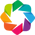

In [10]:
hv.notebook_extension('bokeh','matplotlib')

You have to choose exactly one plotting backend.

Matplotlib supports more projections, but less interactivity.

Bokeh supports only the Mercator projection, but offers better interactivity.

In [11]:
%output backend='matplotlib'

### What is a Cartopy feature?

A Cartopy `Feature` represents a collection of points, lines and polygons with convenience methods for common drawing and filtering operations.

In particular, `NaturalEarthFeature` provides a simple interface to [Natural Earth](http://www.naturalearthdata.com/) shapefiles.

For example, in `cartopy.feature.py` we can find `OCEAN`, an instance of the `NaturalEarthFeature` class.

In [21]:
OCEAN = cf.NaturalEarthFeature(category='physical',
                            name='ocean',
                            scale='110m',
                            edgecolor='face',
                            facecolor=cf.COLORS['water'])
OCEAN

In [32]:
type(OCEAN)

cartopy.feature.NaturalEarthFeature

As you can see, a cartopy `NaturalEarthFeature` instance has a coordinate reference system `crs`.

In [22]:
dir(OCEAN)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_crs',
 '_kwargs',
 'category',
 'crs',
 'geometries',
 'intersecting_geometries',
 'kwargs',
 'name',
 'scale']

The default CRS is the [plate carrée projection](https://en.wikipedia.org/wiki/Equirectangular_projection).

In [23]:
OCEAN.crs

### What is a GeoViews feature?

A GeoViews `Feature` is a Cartopy feature with additional properties and methods.

In [33]:
gvFeature = gv.Feature(cf.OCEAN, group='Ocean')

:Feature   [Longitude,Latitude]
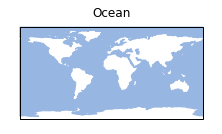

In [37]:
gvFeature

In [35]:
dir(gvFeature)

['_Dimensioned__abstract',
 '_Dimensioned__params',
 '_Element2D__params',
 '_Element__params',
 '_Feature__params',
 '_LabelledData__params',
 '_Parameterized__db_print',
 '_Parameterized__generate_name',
 '_Parameterized__params',
 '_ViewableElement__abstract',
 '_ViewableElement__params',
 '__Element__params',
 '__GeoFeature__params',
 '__add__',
 '__bool__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abstract',
 '_add_parameter',
 '_auxiliary_component',
 '_cached_constants',
 '_cdims_param_value',
 '_crs_param_value',
 '_deep_indexable',

Again, if not specified, the default CRS is the plate carrée projection.

In [36]:
gvFeature.crs

There are some predefined features in `geoviews.feature.py`.

In [8]:
dir(gf)

['Feature',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'borders',
 'cf',
 'coastline',
 'lakes',
 'land',
 'ocean',
 'rivers']

For example, `gf.ocean` is a shortcut for `gv.Feature(cf.OCEAN, group='Ocean')`

:Feature   [Longitude,Latitude]
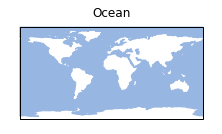

In [7]:
gf.ocean

We can use `gf.ocean` as a shortcut for the `gv.Feature(cf.OCEAN, group='Ocean')`

### Change geographical projection

In [25]:
# PlateCarree is a cylindrical projection (equirectangular projection)
%opts Feature [projection=crs.PlateCarree()]

In [42]:
%opts Feature [projection=crs.Mercator()]

:Layout
   .Coastline.I :Feature   [Longitude,Latitude]
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Overlay.I   :Overlay
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Land.I      :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
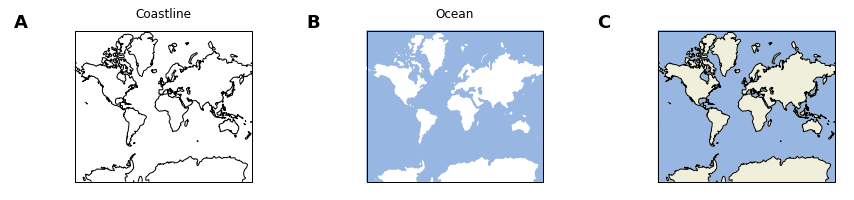

In [43]:
gf.coastline + gf.ocean + gf.ocean*gf.land*gf.coastline

:Layout
   .Coastline.I :Feature   [Longitude,Latitude]
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Overlay.I   :Overlay
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Land.I      :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
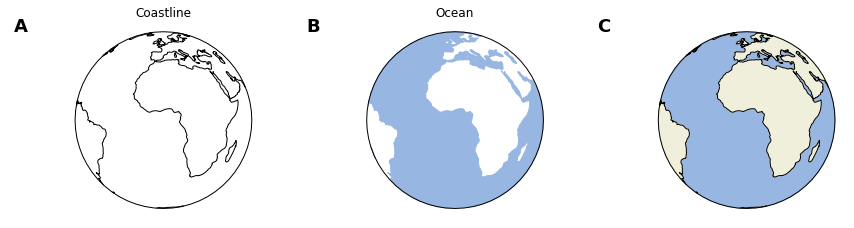

In [25]:
gf.coastline + gf.ocean + hv.Overlay([gf.ocean, gf.land, gf.coastline])

:Layout
   .Ocean.I   :Feature   [Longitude,Latitude]
   .Land.I    :Feature   [Longitude,Latitude]
   .Overlay.I :Overlay
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Land.I      :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
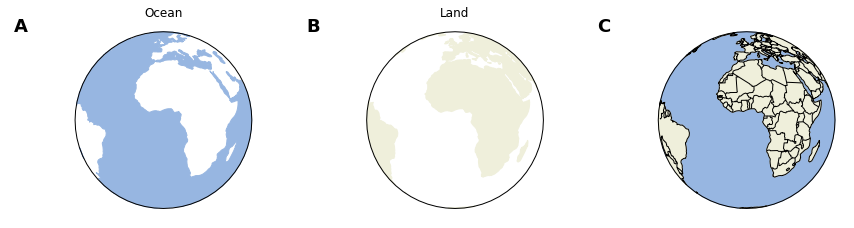

In [20]:
# %%opts Feature [projection=crs.Geostationary()]
(gf.ocean + gf.land + gf.ocean * gf.land * gf.coastline * gf.borders).cols(3)

:Feature   [Longitude,Latitude]
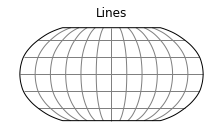

In [21]:
%%opts Feature.Lines (facecolor='none' edgecolor='gray')
graticules = gv.Feature(cf.NaturalEarthFeature(category='physical', name='graticules_30',scale='110m'), group='Lines')
graticules

In [22]:
%%output size=450
features = hv.Overlay([gf.ocean, gf.land, graticules, gf.rivers, gf.lakes, gf.borders, gf.coastline])
features

Exception: An axis may only be assigned one projection type

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Lines.I     :Feature   [Longitude,Latitude]
   .Rivers.I    :Feature   [Longitude,Latitude]
   .Lakes.I     :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
   .Coastline.I :Feature   [Longitude,Latitude]

In [7]:
%%opts Image [colorbar=True fig_size=200] (cmap='viridis')
ensemble = xr.open_dataset('./air.mon.mean.nc')
dir(ensemble)
# dataset = gv.Dataset(ensemble, kdims=['longitude', 'lat', 'time'], crs=crs.PlateCarree())
# dataset.to(gv.Image, ['longitude', 'latitude'], ['surface_temperature'], ['time']) * gf.coastline()

['Conventions',
 'NCO',
 'References',
 '_Dataset__default_attrs',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '


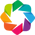

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')

In [23]:
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
         'Stamen Toner': STAMEN_TONER}

No valid tile source URL found in WMTS Element, rendering skipped.

:NdLayout   [Source]
   :WMTS   [Longitude,Latitude]

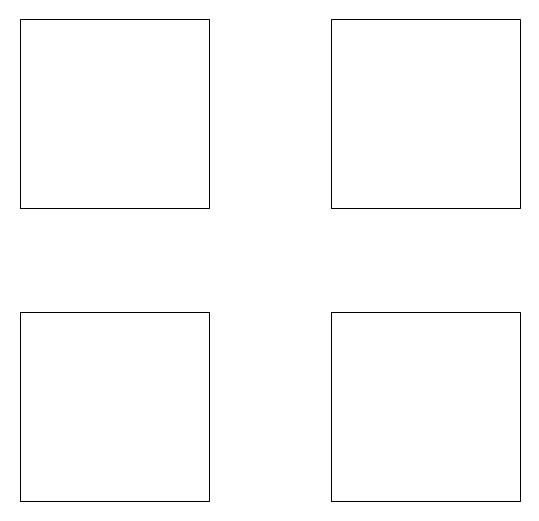

In [24]:
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=ccrs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

In [9]:
%%opts Overlay [width=600 height=300] 
%%opts Points (size=0.005 cmap='viridis') [tools=['hover'] size_index=2 color_index=2 xaxis=None yaxis=None]
(gv.WMTS(tiles['Wikipedia']) *\
population.to(gv.Points, kdims=['Longitude', 'Latitude'],
              vdims=['Population', 'City', 'Country'], crs=ccrs.PlateCarree()))

NameError: name 'population' is not defined